In [1]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train.csv')      # 讀取資料，請勿更改路徑

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import random
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
random.seed(1012)

## 資料分析與前處理

請在此區塊後使用**一個或多個區塊**進行資料分析與前處理，項目可以包含：

- 資料視覺化
- 相關係數
- 決定輸入特徵
- 處理缺失值
- 轉換數值
- 轉換類別
- 其他



In [4]:
# 資料分析與前處理

dff=pd.get_dummies(df, columns=['Sex','Pclass','Embarked'])

df_X = pd.DataFrame(dff[['PassengerId','Age','Fare','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C',
                            'Embarked_Q','Embarked_S','SibSp','Parch']])
df_Y = pd.DataFrame(df['Survived'])

train_x = df_X[['PassengerId','Sex_female','Sex_male', 'Age','Fare','Pclass_1','Pclass_2','Pclass_3','Embarked_C',
                'Embarked_Q','Embarked_S','SibSp','Parch']]    # 取出訓練資料需要分析的資料欄位
train_y = df_Y['Survived']                       # 取出訓練資料的答案

from sklearn.impute import SimpleImputer       # 匯入填補缺失值的工具

imputer = SimpleImputer(strategy='median')     # 創造 imputer 並設定填補策略
age = train_x['Age'].to_numpy().reshape(-1, 1)
imputer.fit(age)                               # 根據資料學習需要填補的值
train_x['Age'] = imputer.transform(age)        # 填補缺失值
train_x.tail()

,PassengerId,Sex_female,Sex_male,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,SibSp,Parch
886,887,0,1,27.0,13.00,0,1,0,0,0,1,0,0
887,888,1,0,19.0,30.00,1,0,0,0,0,1,0,0
888,889,1,0,28.0,23.45,0,0,1,0,0,1,1,2
889,890,0,1,26.0,30.00,1,0,0,1,0,0,0,0
890,891,0,1,32.0,7.75,0,0,1,0,1,0,0,0


雖然Pclass是int，但是直接放進模型會影響結果，所以也用dummies

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


在Pclass1票價分布較分散，其餘兩個較集中且票價較低

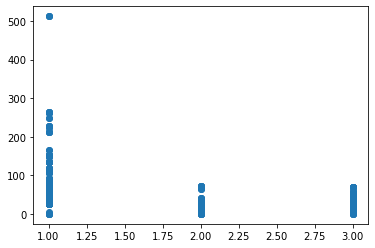

In [7]:
plt.scatter(df['Pclass'],df['Fare'])

因為年齡分布集中於20-40歲所以選擇median來填補缺失值

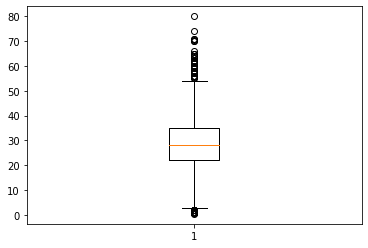

In [8]:
bplot = plt.boxplot(train_x['Age'])
plt.show()

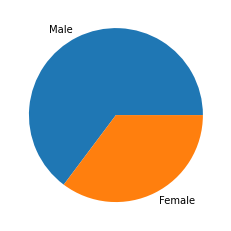

In [9]:
male = sum(train_x['Sex_male']==1)*1
female = sum(train_x['Sex_female']==1)*1
labels = 'Male','Female'
sizes = [male, female]
figs1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
plt.show()

除了男性死亡外，其他三者分布無太大差異，所以用dummies處裡性別

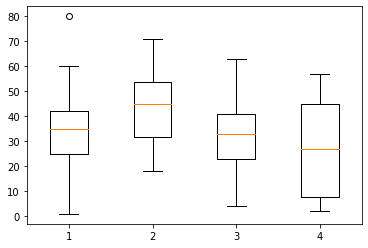

In [10]:
male_sur = df[(df['Sex']=='male') & (df['Survived']==1)].dropna() ##男性存活
male_nsur = df[(df['Sex']=='male') & (df['Survived']==0)].dropna() ##男性死亡
female_sur = df[(df['Sex']=='female') & (df['Survived']==1)].dropna() ##女姓存活
female_nsur = df[(df['Sex']=='female') & (df['Survived']==0)].dropna() ##女性死亡

plt.boxplot(([male_sur['Age'],male_nsur['Age'],female_sur['Age'],female_nsur['Age']]))
plt.show()

## 模型訓練

請在此區塊後使用**一個或多個區塊**進行模型訓練，包含以下內容：

- **選擇模型**
    - 設定模型**超參數**
    - **控制隨機亂數**
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**
    - 最後再使用**所有**資料進行訓練並輸出**準確度**

因模型訓練1準確度低，所以不放在essemble

In [11]:
# 模型訓練1 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
model1.fit(train_x, train_y)                       # 訓練決策樹模型

pred1_y = model1.predict(train_x)                   # 確認模型是否訓練成功
acc1 = accuracy_score(train_y, pred1_y)             # 計算準確度

print('accuracy1: {}'.format(acc1))                 # 輸出準確度

accuracy1: 1.0


In [12]:
# 模型訓練1

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 1.0
    min train accuracy: 1.0
    max train accuracy: 1.0
average valid accuracy: 0.7351515912372105
    min valid accuracy: 0.702247191011236
    max valid accuracy: 0.7640449438202247


In [13]:
# 模型訓練2 GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01,random_state=1012)
model2.fit(train_x, train_y)

pred2_y = model2.predict(train_x)
acc2 = accuracy_score(train_y, pred2_y)

print('accuracy2: {}'.format(acc2))  

accuracy2: 0.8372615039281706


超參數選擇

In [14]:
parameters = {'n_estimators':[5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250],
             'learning_rate':[0.0001,0.001,0.01,0.1,0.2]}

clf = GridSearchCV(model2, parameters, n_jobs=-1)
clf.fit(train_x, train_y)
cv_result = pd.DataFrame.from_dict(clf.cv_results_)

    
print('The parameters of the best model are: ')
print(clf.best_params_)

The parameters of the best model are: 
{'learning_rate': 0.01, 'n_estimators': 150}


In [15]:
# 模型訓練2
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model2 = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01,random_state=1012) # 創造決策樹模型
    model2.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred2_y = model2.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc2 = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred2_y)
    valid_pred2_y = model2.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc2 = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred2_y)
    train_acc_list.append(train_acc2)
    valid_acc_list.append(valid_acc2)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8386663409868099
    min train accuracy: 0.8302945301542777
    max train accuracy: 0.847124824684432
average valid accuracy: 0.8081350825434687
    min valid accuracy: 0.7597765363128491
    max valid accuracy: 0.8539325842696629


In [16]:
# 模型訓練3 RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=175,random_state=1012)
model3.fit(train_x, train_y)

pred3_y = model3.predict(train_x)
acc3 = accuracy_score(train_y, pred3_y)

print('accuracy3: {}'.format(acc3))  

accuracy3: 1.0


模型訓練3overfitting

In [17]:
# 模型訓練3
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    

    model3 = RandomForestClassifier(n_estimators=175,random_state=1012)
    model3.fit(train_x_split, train_y_split)

    train_pred3_y = model3.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc3 = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred3_y)
    valid_pred3_y = model3.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc3 = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred3_y)
    train_acc_list.append(train_acc3)
    valid_acc_list.append(valid_acc3)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 1.0
    min train accuracy: 1.0
    max train accuracy: 1.0
average valid accuracy: 0.813709120582512
    min valid accuracy: 0.7808988764044944
    max valid accuracy: 0.848314606741573


In [18]:
# 模型訓練4 RidgeClassifierCV
from sklearn.linear_model import RidgeClassifierCV

model4 = RidgeClassifierCV()
model4.fit(train_x, train_y)

pred4_y = model4.predict(train_x)
acc4 = accuracy_score(train_y, pred4_y)

print('accuracy4: {}'.format(acc4))  

accuracy4: 0.8013468013468014


In [19]:
# 模型訓練4
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    model4 = RidgeClassifierCV()
    model4.fit(train_x_split, train_y_split)

    train_pred4_y = model4.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc4 = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred4_y)
    valid_pred4_y = model4.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc4 = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred4_y)
    train_acc_list.append(train_acc4)
    valid_acc_list.append(valid_acc4)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8024721464929007
    min train accuracy: 0.7952314165497896
    max train accuracy: 0.8132022471910112
average valid accuracy: 0.7923670830456343
    min valid accuracy: 0.7471910112359551
    max valid accuracy: 0.8314606741573034


In [20]:
# 模型訓練5 BaggingClassifier
from sklearn.ensemble import BaggingClassifier

model5 = BaggingClassifier(n_estimators=200,random_state=123)
model5.fit(train_x, train_y)

pred5_y = model5.predict(train_x)
acc5 = accuracy_score(train_y, pred5_y)

print('accuracy5: {}'.format(acc5))  

accuracy5: 1.0


超參數選擇

In [21]:
parameters = {'n_estimators':[5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]}

clf = GridSearchCV(model5, parameters, n_jobs=-1)
clf.fit(train_x, train_y)
cv_result = pd.DataFrame.from_dict(clf.cv_results_)

    
print('The parameters of the best model are: ')
print(clf.best_params_)

The parameters of the best model are: 
{'n_estimators': 200}


In [22]:
# 模型訓練5
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    model5 = BaggingClassifier(n_estimators=200,random_state=123)
    model5.fit(train_x_split, train_y_split)

    train_pred5_y = model5.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc5 = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred5_y)
    valid_pred5_y = model5.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc5 = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred5_y)
    train_acc_list.append(train_acc5)
    valid_acc_list.append(valid_acc5)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 1.0
    min train accuracy: 1.0
    max train accuracy: 1.0
average valid accuracy: 0.8171050153788212
    min valid accuracy: 0.776536312849162
    max valid accuracy: 0.8651685393258427


因模型訓練6準確率低，所以不放入essemble

In [23]:
# 模型訓練6 GaussianNB
from sklearn.naive_bayes import GaussianNB

model6 = GaussianNB(var_smoothing = 1)
model6.fit(train_x, train_y)

pred6_y = model6.predict(train_x)
acc6 = accuracy_score(train_y, pred6_y)

print('accuracy6: {}'.format(acc6)) 

accuracy6: 0.6161616161616161


In [24]:
parameters = {'var_smoothing':[1,2,3,4,5,6,7,8,9,10]}

clf = GridSearchCV(model6, parameters, n_jobs=-1)
clf.fit(train_x, train_y)
cv_result = pd.DataFrame.from_dict(clf.cv_results_)

    
print('The parameters of the best model are: ')
print(clf.best_params_)

The parameters of the best model are: 
{'var_smoothing': 1}


In [25]:
# 模型訓練6 
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    #RidgeClassifierCV

    model6 = GaussianNB(var_smoothing = 1)
    model6.fit(train_x_split, train_y_split)

    train_pred6_y = model6.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc6 = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred6_y)
    valid_pred6_y = model6.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc6 = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred6_y)
    train_acc_list.append(train_acc6)
    valid_acc_list.append(valid_acc6)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.6161672471122177
    min train accuracy: 0.6002805049088359
    max train accuracy: 0.6362359550561798
average valid accuracy: 0.6162513338773461
    min valid accuracy: 0.5363128491620112
    max valid accuracy: 0.6797752808988764


In [26]:
# 模型訓練7 AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

model7 = AdaBoostClassifier(n_estimators=5,learning_rate=0.0001,random_state=1012)
model7.fit(train_x, train_y)

pred7_y = model7.predict(train_x)
acc7 = accuracy_score(train_y, pred7_y)

print('accuracy7: {}'.format(acc7)) 

accuracy7: 0.7867564534231201


超參數選擇

In [27]:
parameters = {'n_estimators':[5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250],
                              'learning_rate':[0.0001,0.001,0.01,0.1,0.2]}

clf = GridSearchCV(model7, parameters, n_jobs=-1)
clf.fit(train_x, train_y)
cv_result = pd.DataFrame.from_dict(clf.cv_results_)

    
print('The parameters of the best model are: ')
print(clf.best_params_)

The parameters of the best model are: 
{'learning_rate': 0.0001, 'n_estimators': 5}


In [28]:
# 模型訓練7
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    model7 = AdaBoostClassifier(n_estimators=5,learning_rate=0.0001,random_state=1012)
    model7.fit(train_x_split, train_y_split)

    train_pred7_y = model7.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc7 = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred7_y)
    valid_pred7_y = model7.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc7 = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred7_y)
    train_acc_list.append(train_acc7)
    valid_acc_list.append(valid_acc7)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.7867555982791498
    min train accuracy: 0.7769985974754559
    max train accuracy: 0.7994389901823282
average valid accuracy: 0.7867428284476807
    min valid accuracy: 0.7359550561797753
    max valid accuracy: 0.8258426966292135


In [29]:
# 模型訓練8 HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


model8 = HistGradientBoostingClassifier(max_iter=100).fit(train_x, train_y)
model8.fit(train_x, train_y)

pred8_y = model8.predict(train_x)
acc8 = accuracy_score(train_y, pred7_y)

print('accuracy8: {}'.format(acc8)) 

accuracy8: 0.7867564534231201


Essemble

In [30]:
clf = HistGradientBoostingClassifier(max_iter=100).fit(train_x, np.ravel(train_y))
clf.score(train_x, train_y)

0.9955106621773289

In [31]:
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, train_x, train_y, cv=5)
scores.mean()

0.7307701964722867

In [32]:
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0,
    max_depth=1, random_state=0).fit(train_x, train_y)
clf.score(train_x, train_y)

0.8608305274971941

最後採定Essemble，權重為手動測試

In [33]:
modelt = np.zeros_like(train_x['PassengerId'])
for i in range(len(train_x)):
    modelt[i] = (pred2_y[i]*15 + pred3_y[i]*5 + pred5_y[i]*7  + 
                pred7_y[i]*9 + pred8_y[i]*10) / 25
    if modelt [i] >= 0.99 :
        modelt[i] == 1
    else:
        modelt[i] ==0
modelt
acc = accuracy_score(df['Survived'],         # 計算驗證資料準確度
                               modelt)
print(acc)

0.8978675645342312
